<a href="https://colab.research.google.com/github/JacobKranich/Data-Midterm2/blob/main/Jacob_Kranich_Midterm_Project_325_Spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [4]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



In [ ]:
#The purpose of my project is to investigate how voter registration in 2020 was shaped by the covid pandemic restrictions
#The goal is to accurately analyze and engagingly present the given data, and specifically to compare the rate of voter registration in 2016, which can be taken as a normal presidential year, to that in 2020, where Covid hit mid-registration.
#It is important for someone to read this notebook because it provides hard data to support or disprove intuitions about voter registration.

#Question 1: How did Covid restrictions in 2020 affect voter registration?
#Question 2: Did this effect differ vis a vis red vs blue states?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [ ]:
voters.head()
#Jurisdiction is the state the records are coming from, year and month are the time the data is coming from, and new registered voters are the number of new registered voters at that place, date, and time

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data data. (1 point)

In [ ]:
voters.isna().any()

,0
Jurisdiction,False
Year,False
Month,False
New registered voters,False


Check your data types. (1 point)

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [5]:
voters=voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})
voters.head()

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Explain any potential limitations to your data (2 points)

In [ ]:
#This data only comes from 11 states and the district of columbia. In addition, it only comes from two election years, which may have been abnormal compared to historic norms due to Trump running in both of them.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [ ]:
voters.registered_voters.mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:
high_voters = voters.loc[voters.registered_voters>voters.registered_voters.mean()]
high_voters.info()
#36 times

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1 to 93
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               36 non-null     object
 1   Year               36 non-null     int64 
 2   Month              36 non-null     object
 3   registered_voters  36 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:
#sns.histplot(high_voters, x="NAME")
high_voters.value_counts("NAME")
#Arizona went above it 3 times, California and Florida 7, Georgia 1, Illinois 4, North Carolina 6, and Texas 8

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [ ]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

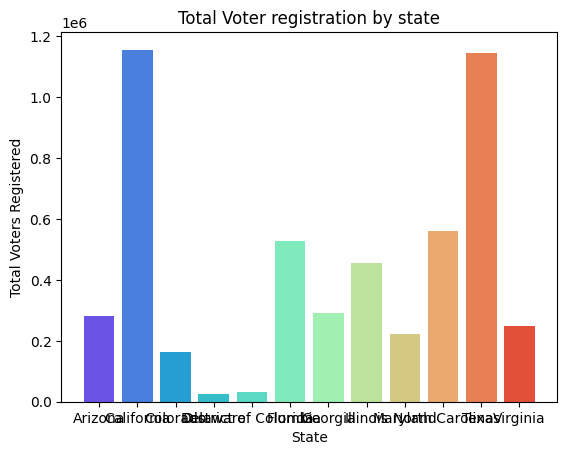

In [13]:
#Total voter registration seems to be mainly determined by total population size, as the largest states had the most voters registered
total_voters = voters.groupby("NAME")["registered_voters"].sum()
total_voters1 = total_voters.to_frame()
#Used the documentation to write that bit, hope it's ok
total_voters1.head()
sns.barplot(total_voters1, x="NAME", y="registered_voters", hue="NAME", palette="rainbow")
plt.xlabel("State")
plt.ylabel("Total Voters Registered")
plt.title("Total Voter registration by state")
plt.plot(10,10)
plt.show()

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

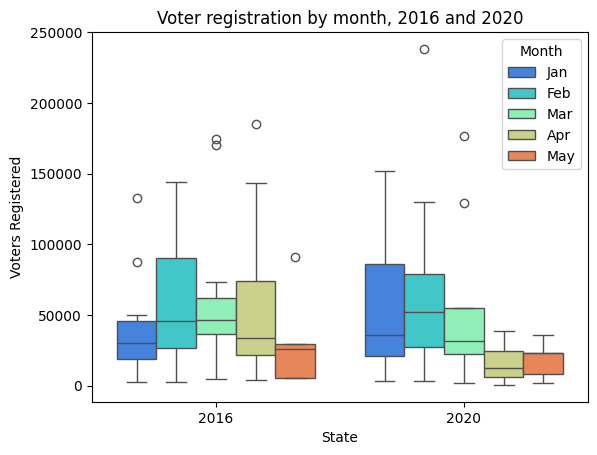

In [15]:
#While voter registration in 2020 was higher than 2016 in the first few months of the year, it drops below the previous average in March, just as covid started
sns.boxplot(voters, x="Year", y="registered_voters", hue="Month", palette="rainbow")
plt.xlabel("State")
plt.ylabel("Voters Registered")
plt.title("Voter registration by month, 2016 and 2020")
plt.show()

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

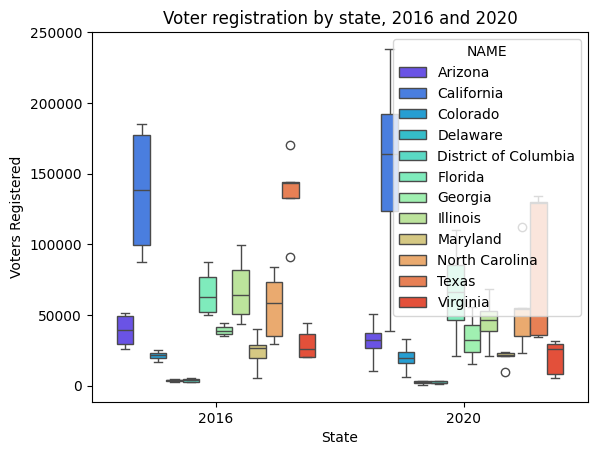

In [ ]:
#Question 1: How did Covid restrictions between 2016 and 2020 affect voter registration?
#Question 2: Did this effect differ vis a vis red vs blue states?

sns.boxplot(voters, x="Year", y="registered_voters", hue="NAME", palette="rainbow")
plt.xlabel("State")
plt.ylabel("Voters Registered")
plt.title("Voter registration by state, 2016 and 2020")
plt.show()


##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'


Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 10.29 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Set our continental US bounding box to us for the next questions. (2 points)

<Axes: >

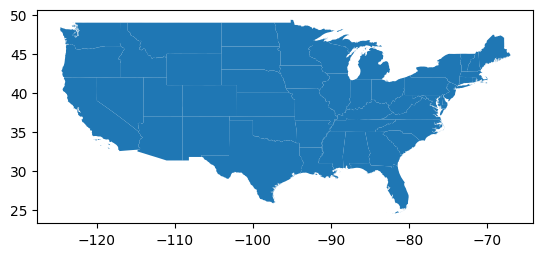

In [ ]:
states = gpd.read_file(shapefile)
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
us = states.cx[minx:maxx, miny:maxy]
us.plot()

Create a dataframe that shows the average voter registration per state. (2 points)

In [ ]:
state_average = voters.groupby("NAME")["registered_voters"].mean()
state_average.head()

,registered_voters
NAME,
Arizona,35311.500
California,144545.375
Colorado,20527.500
Delaware,3166.375
District of Columbia,3248.400


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [ ]:
average_mapped = us.merge(state_average, on="NAME", how="inner")

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

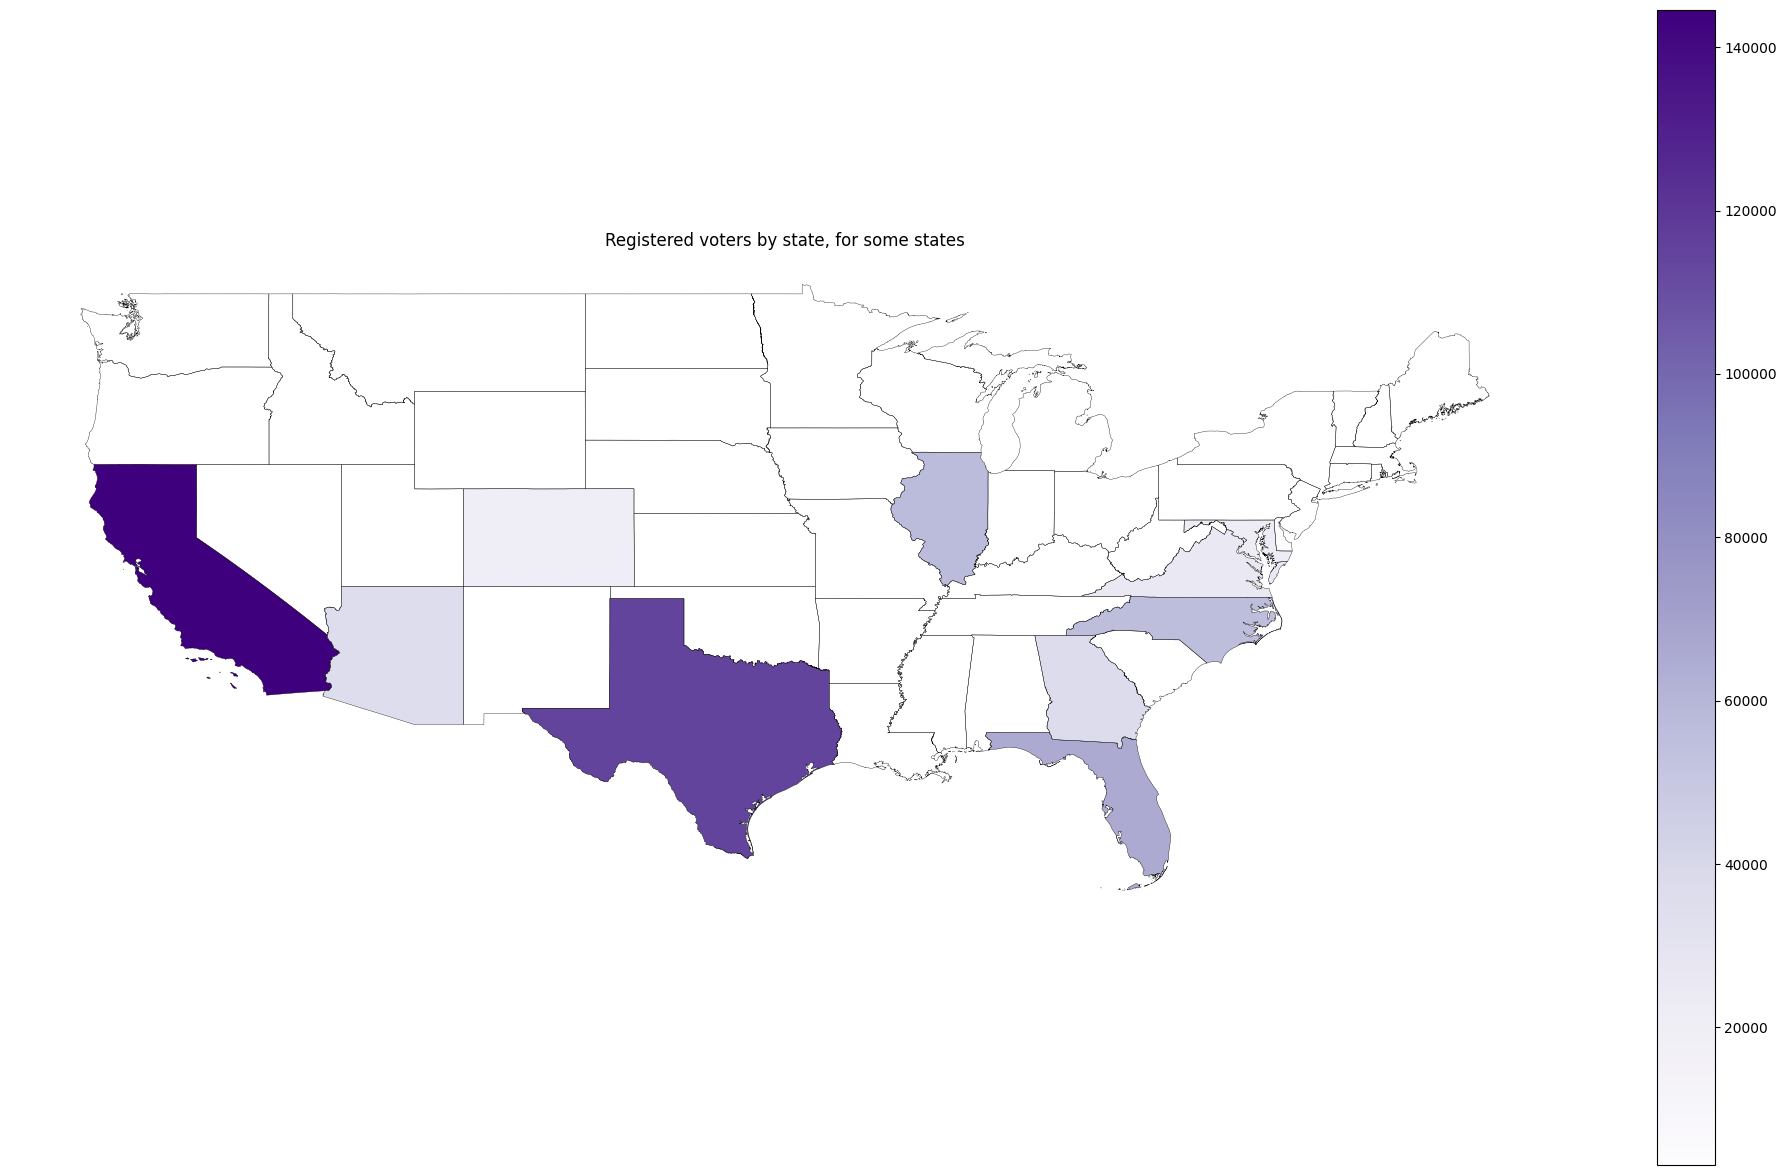

In [ ]:
us_map=us.boundary.plot(figsize=(25,15),color="black",linewidth=.25) #base map
average_mapped.plot(column="registered_voters",ax=us_map,cmap="Heatmap",legend=True,linewidth=.25) #second map
us_map.axis("off")
plt.title("Registered voters by state, for some states")
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


Insights: In 2016, voter registration by month peaked in March, with the data taking the appriximate shape of a bell curve, while in 2020, voter registration peaked in Feb and steadily decreased, likely due to the influence of Covid, as voter registrations had previously been on track to outpace the previous period. In addition, covid appeared to increase the variability in the number of registrations between months, which makes sense, as registrations rapidly went from unusually high in a backlack against Trump to unusually low due to covid isolation.

Suggestions: A broader database of states might help with determining the effects of political factors on state statistics. In addition, data on the population of each state might help reduce the distorting effect of state size on the data and allow us to analyze per capita data. Finally, additional years of data might help to contextualize two elections, in both of which Trump was a candidate.

Possible next steps: If I continued work on this project, I would work on creating a new column in the data relating the number of voters registered to the total number of voters in the state. This would help prevent the problem of california and texas singlehandedly overshadowing the rest of the data. In addition, I would add a column giving the general political trend of each state, and use this to analyse if the political affiliation of a state's governor affected the degree of disruption caused by covid.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

In [ ]:
https://github.com/JacobKranich/Data-Midterm2/blob/main/Jacob_Kranich_Midterm_Project_325_Spring.ipynb

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
Jacob Kranich